# Report

## Data sources

TBA

### Information about the data

TBA

In [69]:
from matplotlib.pyplot import *
from numpy import *
from collections import OrderedDict
import pandas as pd

from funcs import *

%load_ext autoreload
%autoreload 2
%matplotlib inline
rcParams["figure.figsize"] = (12,6)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data

In [ ]:
cgrt = pd.read_csv('OxCGRT_latest.csv')
covid = pd.read_csv('owid-covid-data.csv')

In [12]:
cgrt.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-01,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-02,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-03,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-04,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,2020-01-05,0.0,NaN,0.0,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
covid.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [11]:
cgrt.Date = pd.to_datetime(cgrt.Date, format='%Y%m%d')
covid.date = pd.to_datetime(covid.date, format='%Y-%m-%d')

The `covid` dataset does not specify stats with regional precision as the `cgrt` does. Since I don't yet know how to compute `StringencyIndex` for a whole country from its regions, best is just to get rid of countries with regions for now and later analyse them separately.

In [7]:
countries_with_regions = cgrt[cgrt['RegionName'].notnull()].CountryName.unique()
countries_with_regions

array(['Brazil', 'Canada', 'United Kingdom', 'United States'],
      dtype=object)

In [18]:
cgrt_nr = cgrt[~cgrt.CountryName.str.contains("|".join(countries_with_regions))]

## Avg(SeverityIndex) ~ Total deaths per million

In [43]:
l1 = cgrt_nr[['CountryCode', 'CountryName', 'Date','StringencyIndex']]
l2 = covid[['continent','iso_code', 'date', 'total_deaths_per_million']]
l1l2 = pd.merge(l1, l2, how='inner', left_on=['CountryCode','Date'], right_on=['iso_code', 'date'])
stringency_vs_dpm = l1l2.groupby('CountryCode').agg(
    continent=('continent','first'),
    country_name=('CountryName','first'), 
    mean_stringency_index=('StringencyIndex', 'mean'), 
    total_deaths_per_million=('total_deaths_per_million', 'max')
)
stringency_vs_dpm = stringency_vs_dpm.dropna()

In [23]:
color_map = OrderedDict({
    '0 - 499':'whitesmoke',
    '500 - 999': 'lightgray',
    '1000 - 1499': 'darkgray',
    '1500 - 1999': 'gray'
})

### World

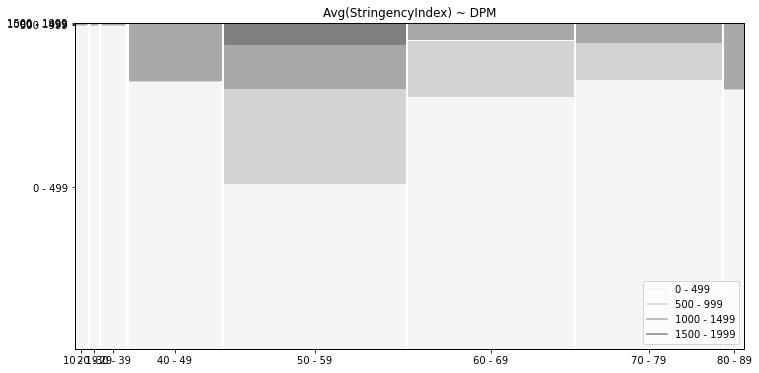

In [70]:
plot_avg_index_vs_dpm(stringency_vs_dpm, color_map, title='Avg(StringencyIndex) ~ DPM')

### By continent

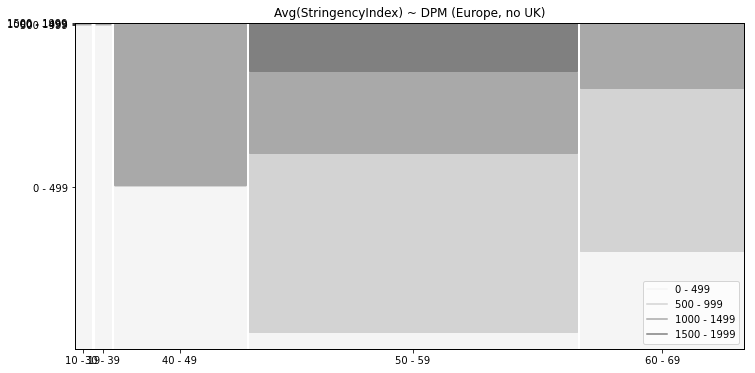

In [90]:
eu_stringency_vs_dpm = stringency_vs_dpm[stringency_vs_dpm.continent=='Europe'].copy()
plot_avg_index_vs_dpm(eu_stringency_vs_dpm, color_map, title='Avg(StringencyIndex) ~ DPM (Europe, no UK)')

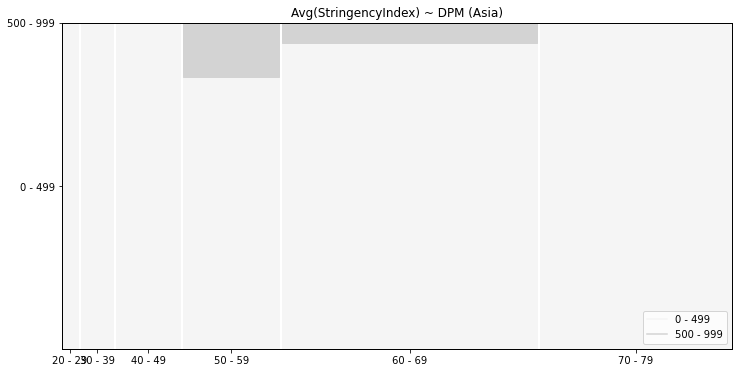

In [78]:
asia_stringency_vs_dpm = stringency_vs_dpm[stringency_vs_dpm.continent=='Asia'].copy()
plot_avg_index_vs_dpm(asia_stringency_vs_dpm, color_map, title='Avg(StringencyIndex) ~ DPM (Asia)')

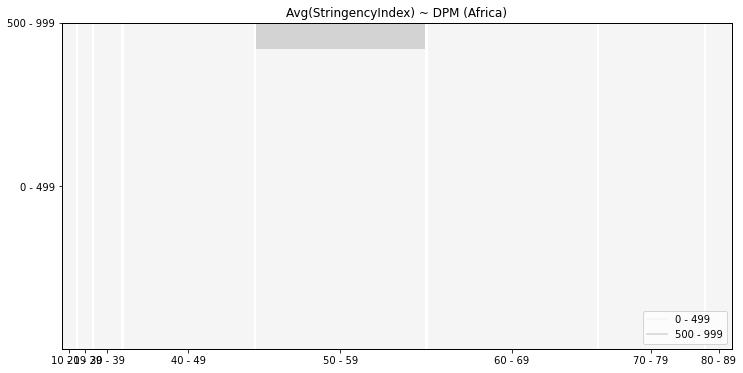

In [80]:
africa_stringency_vs_dpm = stringency_vs_dpm[stringency_vs_dpm.continent=='Africa'].copy()
plot_avg_index_vs_dpm(africa_stringency_vs_dpm, color_map, title='Avg(StringencyIndex) ~ DPM (Africa)')

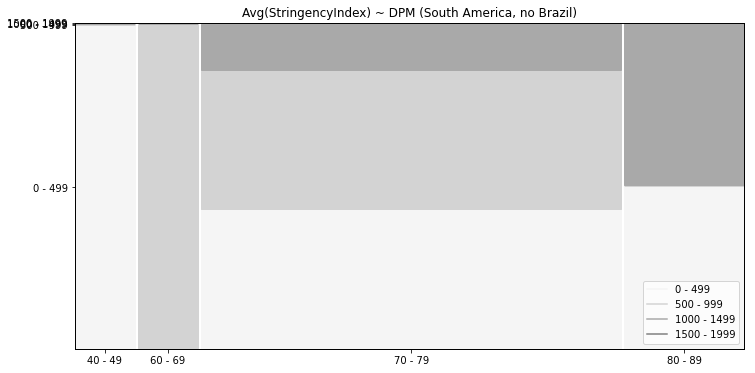

In [89]:
sa_stringency_vs_dpm = stringency_vs_dpm[stringency_vs_dpm.continent=='South America'].copy()
plot_avg_index_vs_dpm(sa_stringency_vs_dpm, color_map, title='Avg(StringencyIndex) ~ DPM (South America, no Brazil)')

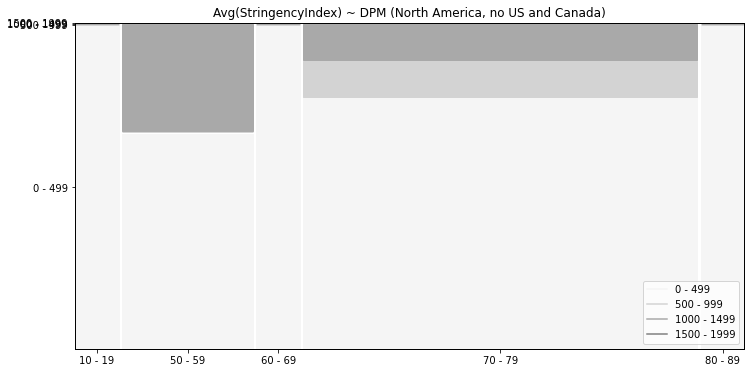

In [88]:
na_stringency_vs_dpm = stringency_vs_dpm[stringency_vs_dpm.continent=='North America'].copy()
plot_avg_index_vs_dpm(na_stringency_vs_dpm, color_map, title='Avg(StringencyIndex) ~ DPM (North America, no US and Canada)')

Observations:
* countries with average StringencyIndex between 50-59 did the worst. This is probably due to indecisiveness, not allowing for herd immunity to develop and at the same time not prevent transmission risk enough; 
* as far as saving lives is concerned, taking no action is almost identical to taking severe actions.

In [77]:
eu_stringency_vs_dpm[eu_stringency_vs_dpm.country_name=='Lithuania'].mean_stringency_index

CountryCode
LTU    50.84727
Name: mean_stringency_index, dtype: float64